<a href="https://colab.research.google.com/github/izzyasi/MachineLearningPIB/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Conexão com o drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importações necessárias

# cálculos numéricos
import numpy as np

# ler, agrupar, organizar, explorar, filtrar, manipular e combinar dados
# suporta variados formatos, como CSV, Excel e JSON e que possibilita
# misturar diferentes bancos de dados simultaneamente
import pandas as pd

# criação de gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# lidar com grandes quantidades de números, lidar com estatísticas, integração numérica,
# solução de equações diferenciais, otimização, integração, álgebra linear, funções especiais,
# polinômios
from scipy import stats

# aplicação prática de machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

# Medidas de avaliação
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

# Separação dos arquivos treino, teste
from sklearn.model_selection import train_test_split

# Visualizar todas as colunas e linhas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_excel('/content/drive/MyDrive/aula de quarta/igm_modificado.xlsx')
df.shape

(5570, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   regiao                       5570 non-null   object 
 1   estado                       5570 non-null   object 
 2   municipio                    5570 non-null   object 
 3   codigo_mun                   5570 non-null   int64  
 4   capital                      5570 non-null   int64  
 5   porte                        5570 non-null   object 
 6   populacao                    5570 non-null   int64  
 7   area                         5570 non-null   float64
 8   densidade_dem                5566 non-null   float64
 9   pib                          5570 non-null   float64
 10  pib_pc                       5570 non-null   float64
 11  participacao_transf_receita  4893 non-null   float64
 12  servidores                   5233 non-null   float64
 13  comissionados     

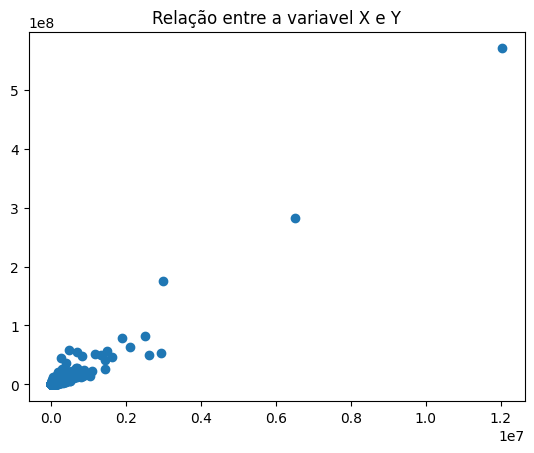

In [6]:
# Gráfico de dispersão entre população e pib
plt.title('Relação entre a variavel X e Y')
plt.scatter(x=df['populacao'], y=df['pib'])
plt.show()

# **REGRESSÃO LINEAR SIMPLES**

In [7]:
df = pd.read_excel('/content/drive/MyDrive/aula de quarta/igm_modificado.xlsx')


In [8]:
df['populacao'].isnull().sum()

np.int64(0)

In [9]:
df['pib'].isnull().sum()

np.int64(0)

In [10]:
x = np.array(df['populacao']).reshape((-1, 1)) # variável independente/preditora x
y = np.array(df['pib']) # variável dependente y

In [11]:
#Escolhi a pooulação porque quanto mais pessoas em municipio, maior tende a ser o pib

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4456, 1)
(1114, 1)
(4456,)
(1114,)


In [13]:
modelo_1 = LinearRegression()

modelo_1.fit(x_train, y_train)


LinearRegression()

In [14]:
print('Intercepto (a ou b0):', modelo_1.intercept_)

print('Coeficiente (b1):', modelo_1.coef_)

Intercepto (a ou b0): -597452.1655210614
Coeficiente (b1): [42.57598064]


In [15]:
import statsmodels.api as sm

x_train_with_const = sm.add_constant(x_train)

modelo_stats = sm.OLS(y_train, x_train_with_const).fit()

summary = modelo_stats.summary()

print(summary)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 6.865e+04
Date:                Tue, 13 May 2025   Prob (F-statistic):               0.00
Time:                        23:31:41   Log-Likelihood:                -71969.
No. Observations:                4456   AIC:                         1.439e+05
Df Residuals:                    4454   BIC:                         1.440e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.975e+05   3.79e+04    -15.744      0.0

In [16]:
y_pred = modelo_1.predict(x_test)
y_pred[10]

np.float64(-478835.4834442388)

In [17]:
df1=pd.DataFrame({'Real': y_test, 'Predicted':y_pred})

df1['Predicted'] = round(df1['Predicted'],3)

df1['Razao'] = round(df1['Predicted']/df1['Real'],3)

print(df1.shape)
df1.head(15)

(1114, 3)


,Real,Predicted,Razao
0,79009.30,1.198042e+04,0.152
1,102866.46,-2.685101e+05,-2.610
2,251764.98,-7.082986e+04,-0.281
3,136754.99,-1.440180e+05,-1.053
4,158996.04,-2.367059e+05,-1.489
5,135171.08,-1.251994e+05,-0.926
6,118137.81,-6.448604e+04,-0.546
7,6538928.94,1.676307e+07,2.564
8,147650.76,1.906292e+05,1.291
9,74782.78,-1.106384e+05,-1.479


In [18]:
MAE_M1 = metrics.mean_absolute_error(y_test, y_pred)
print('MAE_M1:', metrics.mean_absolute_error(y_test, y_pred))

MSE_M1 = metrics.mean_squared_error(y_test, y_pred)
print('MSE_M1:', metrics.mean_squared_error(y_test, y_pred))

RMSE_M1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE_M1:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2_SCORE_M1 = metrics.r2_score(y_test, y_pred)
print('R2_SCORE_M1:', metrics.r2_score(y_test, y_pred))

MAE_M1: 768883.8265932355
MSE_M1: 6371437495627.211
RMSE_M1: 2524170.6550126937
R2_SCORE_M1: 0.843765331175365


In [19]:
#a equação final do modelo
#PIB = -5.975e+05 + 42.576 * População

# **REGRESSÃO LINEAR MÚLTIPLA**

In [20]:
df = pd.read_excel('/content/drive/MyDrive/aula de quarta/igm_modificado.xlsx')

In [21]:
df['densidade_dem'].isnull().sum()

np.int64(4)

In [22]:
df['densidade_dem'].fillna(df['densidade_dem'].mean(), inplace=True)

<ipython-input-22-6582333ec709>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['densidade_dem'].fillna(df['densidade_dem'].mean(), inplace=True)


In [23]:
x = np.array(df[['populacao','densidade_dem']]) # variável independente x
y = np.array(df['pib']) # variável dependente y

In [24]:
#escolhi essas variaveis pois variáveis elas tem uma relação com o desenvolvimento econômico dos municípios, o que afeta diretamente o pib, já que mais pessoas por quilômetro quadrado podem indicar um maior desenvolvimento economico, o que pode estar relacionado a um pib mais elevado.

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4456, 2)
(1114, 2)
(4456,)
(1114,)


In [26]:
modelo_2 = LinearRegression()

modelo_2.fit(x_train,y_train)

LinearRegression()

In [27]:
print('Intercepto (a ou b0):', modelo_2.intercept_)

print('Coeficiente (b1 b2):', modelo_2.coef_)

Intercepto (a ou b0): -530422.6901112843
Coeficiente (b1 b2): [  43.60154862 -956.43838364]


In [28]:
import statsmodels.api as sm

x_train_with_const = sm.add_constant(x_train)

modelo_stats = sm.OLS(y_train, x_train_with_const).fit()

summary = modelo_stats.summary()

print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 3.594e+04
Date:                Tue, 13 May 2025   Prob (F-statistic):               0.00
Time:                        23:31:47   Log-Likelihood:                -71873.
No. Observations:                4456   AIC:                         1.438e+05
Df Residuals:                    4453   BIC:                         1.438e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.304e+05   3.74e+04    -14.167      0.0

In [29]:
y_pred = modelo_2.predict(x_test)
y_pred[10]

np.float64(-445197.79039819306)

In [30]:
df1=pd.DataFrame({'Atual': y_test, 'Predicted':y_pred})

df1['Predicted'] = round(df1['Predicted'],3)

df1['Razao'] = round(df1['Predicted']/df1['Atual'],3)

print(df1.shape)
df1.head(15)

(1114, 3)


,Atual,Predicted,Razao
0,79009.30,7.676092e+04,0.972
1,102866.46,-2.737067e+05,-2.661
2,251764.98,-1.894749e+04,-0.075
3,136754.99,-1.097754e+05,-0.803
4,158996.04,-1.749508e+05,-1.100
5,135171.08,-6.219297e+04,-0.460
6,118137.81,1.318169e+04,0.112
7,6538928.94,1.662822e+07,2.543
8,147650.76,2.661212e+05,1.802
9,74782.78,-8.085223e+04,-1.081


In [31]:
MAE_M2 = metrics.mean_absolute_error(y_test, y_pred)
print('MAE_M2:', metrics.mean_absolute_error(y_test, y_pred))

MSE_M2 = metrics.mean_squared_error(y_test, y_pred)
print('MSE_M2:', metrics.mean_squared_error(y_test, y_pred))

RMSE_M2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE_M2:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2_SCORE_M2 = metrics.r2_score(y_test, y_pred)
print('R2_SCORE_M2:', metrics.r2_score(y_test, y_pred))

MAE_M2: 724011.5623497972
MSE_M2: 5560563619102.829
RMSE_M2: 2358084.7353525762
R2_SCORE_M2: 0.8636488522244659


In [32]:
#PIB = −530400 + 43.60 × População - 956.44 x Densidade domografica

# **XGBOOST**

In [33]:
df = pd.read_excel('/content/drive/MyDrive/aula de quarta/igm_modificado.xlsx')

In [34]:
#escolhi idhm pois tem uma relação forte com o pib, já que municípios com maior IDHM tendem a ter economias mais desenvolvidas

In [35]:
df['idhm'].isnull().sum()

np.int64(584)

In [36]:
df['idhm'].fillna(df['idhm'].mean(), inplace=True)

<ipython-input-36-a2b2ec94ce08>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['idhm'].fillna(df['idhm'].mean(), inplace=True)


In [37]:
df_novo = pd.get_dummies(df, columns=['regiao', 'estado', 'porte', 'municipio', 'ranking_igm'], drop_first=True)
y = df_novo['pib']
X = df_novo.drop('idhm', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [38]:
xgb_regressor = XGBRegressor(random_state=42)

xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [39]:
xgb_result = xgb_regressor.predict(X_test)
xgb_result[10]

np.float32(408540.44)

In [40]:
MAE_xgb = metrics.mean_absolute_error(y_test, xgb_result)
print('MAE_xgb:', metrics.mean_absolute_error(y_test, xgb_result))

MSE_xgb = metrics.mean_squared_error(y_test, xgb_result)
print('MSE_xgb:', metrics.mean_squared_error(y_test, xgb_result))

RMSE_xgb = np.sqrt(metrics.mean_squared_error(y_test, xgb_result))
print('RMSE_xgb:', np.sqrt(metrics.mean_squared_error(y_test, xgb_result)))

MAE_xgb: 231660.5008515672
MSE_xgb: 32143269747192.906
RMSE_xgb: 5669503.483303711


# **Random Forest**

In [41]:
rf_regressor = RandomForestRegressor(random_state=42)

rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [42]:
rf_result = rf_regressor.predict(X_test)
rf_result[10]

np.float64(402961.8373)

In [43]:
MAE_rf = metrics.mean_absolute_error(y_test, rf_result)
print('MAE_rf:', metrics.mean_absolute_error(y_test, rf_result))

MSE_rf = metrics.mean_squared_error(y_test, rf_result)
print('MSE_rf:', metrics.mean_squared_error(y_test, rf_result))

RMSE_rf = np.sqrt(metrics.mean_squared_error(y_test, rf_result))
print('RMSE_rf:', np.sqrt(metrics.mean_squared_error(y_test, rf_result)))

MAE_rf: 134449.85803638533
MSE_rf: 17075522781838.344
RMSE_rf: 4132253.9590202277


In [44]:
print('MODELO 1')
print("MAE_M1", round(MAE_M1,2))
print("MSE_M1", round(MSE_M1,2))
print("RMSE_M1", round(RMSE_M1,2))
print("R2_SCORE_M1", round(R2_SCORE_M1,2))
print('#################################')

print('MODELO 2')
print("MAE_M2", round(MAE_M2,2))
print("MSE_M2", round(MSE_M2,2))
print("RMSE_M2", round(RMSE_M2,2))
print("R2_SCORE_M2", round(R2_SCORE_M2,2))
print('#################################')

print('XGBOOST')
print("MAE_xgb", round(MAE_xgb,2))
print("MSE_xgb", round(MSE_xgb,2))
print("RMSE_xgb", round(RMSE_xgb,2))
print('#################################')

print('RANDOM FOREST')
print("MAE_rf", round(MAE_rf,2))
print("MSE_rf", round(MSE_rf,2))
print("RMSE_rf", round(RMSE_rf,2))

MODELO 1
MAE_M1 768883.83
MSE_M1 6371437495627.21
RMSE_M1 2524170.66
R2_SCORE_M1 0.84
#################################
MODELO 2
MAE_M2 724011.56
MSE_M2 5560563619102.83
RMSE_M2 2358084.74
R2_SCORE_M2 0.86
#################################
XGBOOST
MAE_xgb 231660.5
MSE_xgb 32143269747192.91
RMSE_xgb 5669503.48
#################################
RANDOM FOREST
MAE_rf 134449.86
MSE_rf 17075522781838.34
RMSE_rf 4132253.96


In [45]:
# A justificativa da escolha dessas 3 metricas de avaliação

# Erro Absoluto Médio (MAE): mede as distâncias entre valores preditos e observados.
# Essa métrica não é muito influenciada pelos outliers. Quanto menor seu valor, melhor

# Erro Quadrático Médio (MSE): indicada para problemas nos quais grandes erros não são tolerados.
# Mais difícil de interpretar, pois eleva a unidade ao quadrado. Quanto menor seu valor, melhor

# Raiz do Erro Quadrático Médio (RMSE): tem a mesma unidade dos valores observados e preditos.
# Seu resultado é uma medida do desvio médio (erro) entre observado e predito

In [46]:
xgb_importance = xgb_regressor.feature_importances_
xgb_features = pd.Series(xgb_importance, index=X_train.columns).sort_values(ascending=False)
print('Importância das Variáveis - XGBoost:')
print(xgb_features.head(10))

rf_importance = rf_regressor.feature_importances_
rf_features = pd.Series(rf_importance, index=X_train.columns).sort_values(ascending=False)
print('Importância das Variáveis - Random Forest:')
print(rf_features.head(10))

Importância das Variáveis - XGBoost:
servidores                     0.790741
pib                            0.084493
area                           0.034633
estado_DF                      0.033935
codigo_mun                     0.023559
jornada_trabalho               0.008538
participacao_transf_receita    0.007095
exp_anos_estudo                0.004882
nota_ciencias                  0.003905
municipio_BELO HORIZONTE       0.003176
dtype: float32
Importância das Variáveis - Random Forest:
pib                            0.426577
ranking_igm_17Âº               0.160924
comissionados                  0.115561
municipio_SAO PAULO            0.093772
servidores                     0.085407
codigo_mun                     0.035867
populacao                      0.033420
participacao_transf_receita    0.015855
ranking_igm_5Âº                0.008039
estado_DF                      0.007513
dtype: float64
